1. **重新审视过拟合**
    * 偏差-方差权衡：
        * 偏差: 度量了学习算法的期望预测与真实结果的偏离程度，刻画了学习算法本身的拟合能力。
        * 方差: 度量了同样大小的训练集的变动所导致的学习性能的变化，刻画了数据扰动所造成的影响。
        * 噪声: 表达了当前任务上任何学习算法所能达到的期望泛化误差的下界，也就是最小值。
        * 泛化误差: 可以分解为偏差、方差和噪声之和。
2. **实践中的dropout**
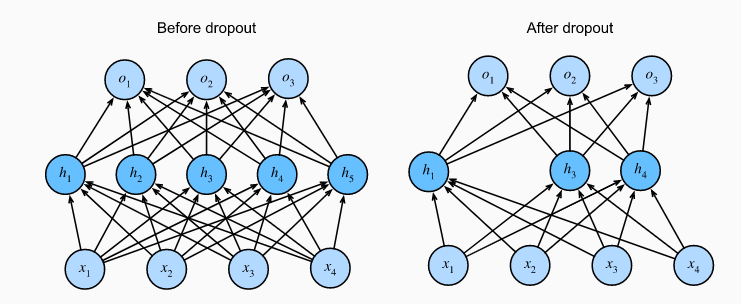

3. **从零开始实现**


In [2]:
# 以dropout的概率丢弃张量输入X中的元素，如上所述重新缩放剩余部分：将剩余部分除以1.0-dropout。
import torch
from torch import nn
from d2l import torch as d2l


def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃。
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留。
    if dropout == 0:
        return X
    mask = (torch.Tensor(X.shape).uniform_(0, 1) > dropout).float() # 从均匀分布中提取更简单符合常识
    return mask * X / (1.0 - dropout)

In [3]:
# 引入的Fashion-MNIST数据集。我们定义具有两个隐藏层的多层感知机，每个隐藏层包含256个单元。
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

In [12]:
# 定义模型
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

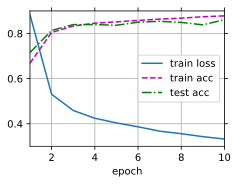

In [13]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [5]:
# 简洁实现-定义模型
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

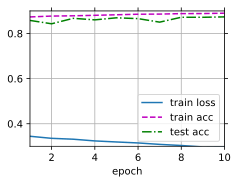

In [8]:
# 对模型进行训练和测试
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [10]:
X = torch.arange(16, dtype = torch.float32).reshape((2, 8))
torch.Tensor(X.shape).uniform_(0, 2)

tensor([[0.2579, 0.1835, 0.0132, 0.3557, 1.5263, 1.9559, 1.6674, 1.0451],
        [1.8540, 0.6857, 1.9046, 1.1723, 1.1951, 1.8180, 1.1779, 1.6188]])